# Telcom Churn Project

# Data Understanding, Reading, and Data Cleaning(EDA)

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np

In [145]:
# reading the dataset
df = pd.read_csv('../data/raw/churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [146]:
df.shape

(7043, 21)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [148]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [149]:
# checking for duplicate values
df.duplicated().any()

np.False_

In [150]:
# checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [151]:
# TotalCharges is object (string) but should be numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

insight : There are 11 hidden missing values in TotalCharges column
1. We convert TotalCharges to numeric column and then check the null values
2. 11/7043 rows are null meaning - (11/7043) * 100 = 0.156% is missing values in the dataset ~ very small
3. We either impute the null rows with median or simply drop the rows because missing value is 0.15%

## Target Variable Analysis

/var/folders/0j/xm__613x13l7smp4fldvtq240000gn/T/ipykernel_18995/4033511568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


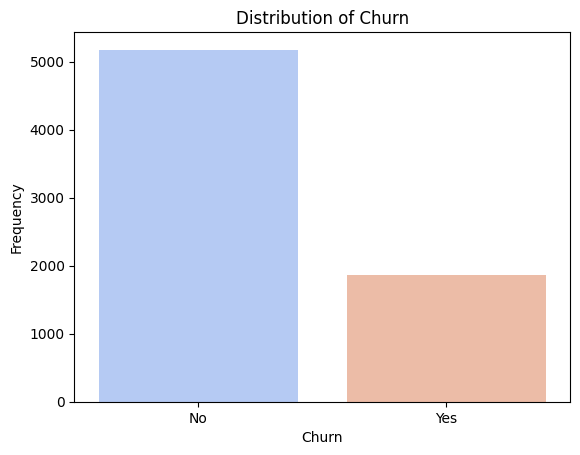

In [152]:
# checking distribution of target column - Churn
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

Insight : The dataset is imbalanced. Most people stayed (0), fewer people left (1).

In [153]:
# checking the distribution of target variable in percentage
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

insight :
No Churn: 73.5%
Churn: 26.5%

1. Imbalanced dataset needs handling
2. Metrics to be used for the problem dataset : Recall, Precision, F1, ROC-AUC

In [164]:
# converting target variable to binary (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1 })
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [165]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Columns overview

In [154]:
# identifying categorical and numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)  

Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

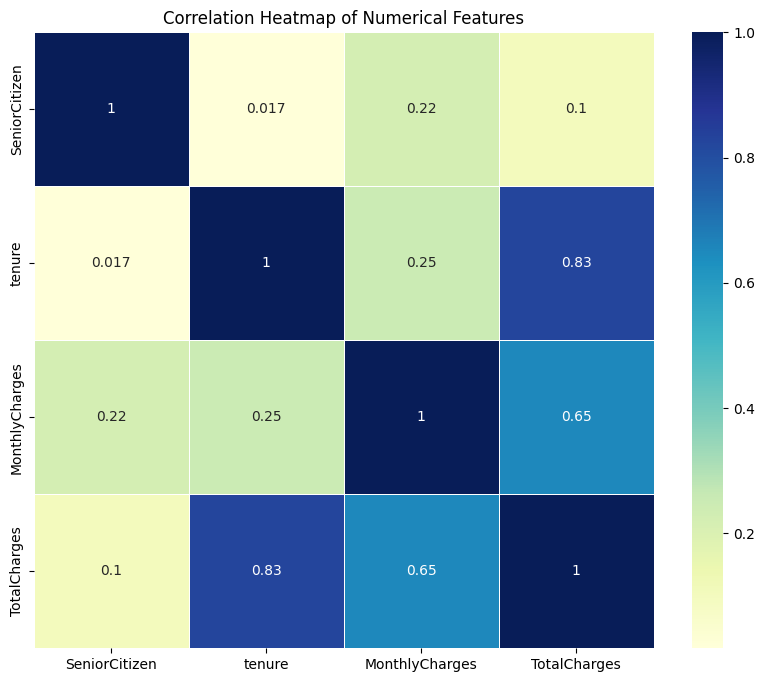

In [155]:
# corelation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')

insight :
1. when coefficient is 1 : Perfect positive correlation. Every feature has a 1.0 with itself (the diagonal line).
2. near 0 : no linear relationship, eg - tenure with senior citizen - meaning being a senior doesn't tell you anything about how long they’ve been a customer.
3. Positive Values (0.22, 0.25): As one goes up, the other tends to go up. Here, MonthlyCharges has a slight positive correlation (0.25) with tenure, suggesting that long-term customers might have slightly higher bills.

In [157]:
# 1. Dropped rows where missing values are present as the null value percentage in the dataset is ~0.15%
# 2. Dropped customerID as it is not useful for analysis
df = df.dropna().drop(columns=['customerID'])
df.shape

(7032, 20)

# Numerical Columns Analysis

In [158]:
# checking skewness of numerical features
df[numerical_columns].skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

insight :
| Skew Value | Meaning       |
| ---------- | ------------- |
| ~0         | Symmetric     |
| 0.5–1      | Moderate skew |
| >1         | Highly skewed |

1. alomst symetric, no transformation needed - tenure, MonthlyCharges(negative)
2. highly skewed - TotalCharges and SeniorCitizen
3. SeniorCitizen is binary(0/1) → not treated as continuous, so Skewness is meaningless for binary variables here.

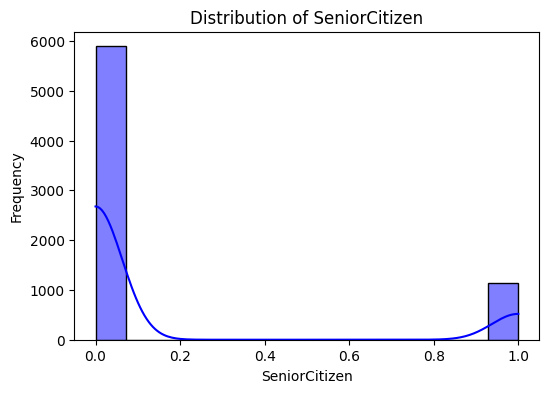

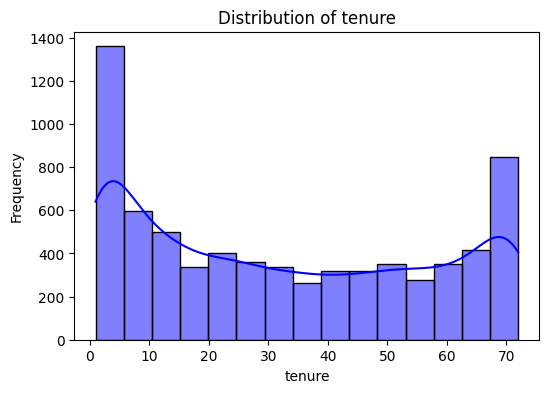

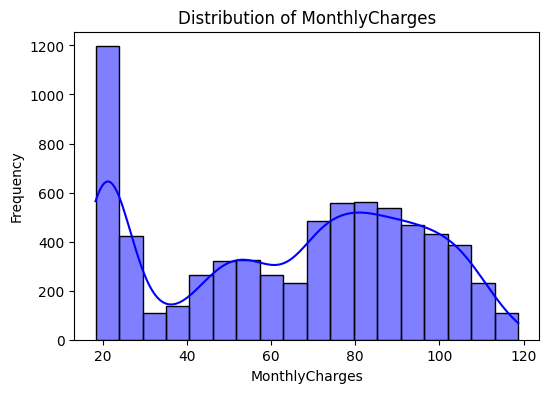

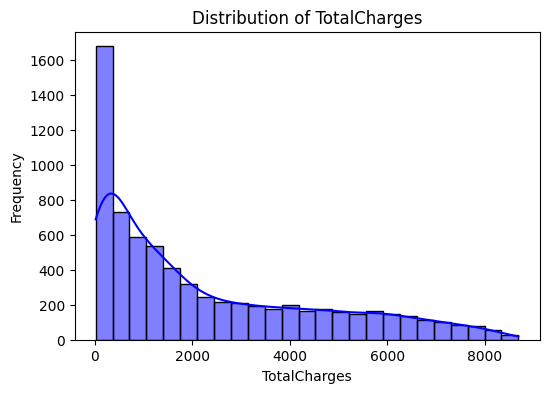

In [159]:
# plotting histograms for numerical features to check their distribution and skewness
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [162]:
# checking the distribution min and max values of TotalCharges & SeniorCitizen to understand the skewness
total_charges_distribution = df['TotalCharges'].describe()
seniorcitizen_distribution = df['SeniorCitizen'].describe()
print("TotalCharges Distribution:\n", total_charges_distribution)
print("\nSeniorCitizen Distribution:\n", seniorcitizen_distribution)

TotalCharges Distribution:
 count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

SeniorCitizen Distribution:
 count    7032.000000
mean        0.162400
std         0.368844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64


insight :
1. TotalCharges : right skeweked, Tree models can handle skew
2. Logistic regression can handle moderate skew - No log transform needed yet.
3. High TotalCharges = Long-term loyal customer, so we keep the max values(outliers)
4. scaling needed for logistic regression later

# Categorical columns analysis